In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
df=pd.read_csv("Titanic-Dataset.csv")

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
df.shape

(891, 12)

In [164]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [165]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [166]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [167]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [168]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [169]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [170]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode)

In [171]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [172]:
df.shape

(891, 8)

C:\Users\praveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

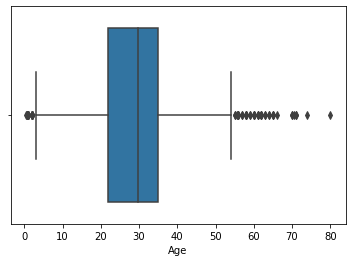

In [173]:
sns.boxplot(df["Age"])

In [174]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
print(q1)
print(q3)

22.0
35.0


In [175]:
IQR=q3-q1
IQR

13.0

In [176]:
upper_limit=IQR*1.5+q3

In [177]:
upper_limit

54.5

In [178]:
lower_limit=q1-IQR*1.5

In [179]:
lower_limit

2.5

In [180]:
df.median()

C:\Users\praveen\AppData\Local\Temp/ipykernel_16940/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Survived     0.000000
Pclass       3.000000
Age         29.699118
SibSp        0.000000
Parch        0.000000
Fare        14.454200
dtype: float64

In [181]:
df=df[df["Age"]>lower_limit]

In [182]:
df=df[df["Age"]<upper_limit]

C:\Users\praveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

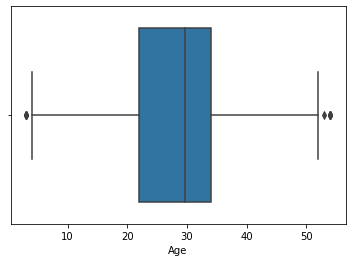

In [183]:
sns.boxplot(df["Age"])

In [184]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    int64  
 1   Pclass    825 non-null    int64  
 2   Sex       825 non-null    object 
 3   Age       825 non-null    float64
 4   SibSp     825 non-null    int64  
 5   Parch     825 non-null    int64  
 6   Fare      825 non-null    float64
 7   Embarked  825 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 58.0+ KB


In [186]:
df.shape

(825, 8)

In [187]:
x=df.iloc[:,1:8]
y=df["Survived"]

In [188]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [189]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [190]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [191]:
x["Sex"]=le.fit_transform(x["Sex"])

In [192]:
x['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 825, dtype: int32

In [193]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [194]:
print(x["Embarked"].dtype)

object


In [195]:
x["Embarked"].isnull().any()

False

In [196]:
x.Embarked.value_counts()

S                                                                                                                                                                                         599
C                                                                                                                                                                                         152
Q                                                                                                                                                                                          73
<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>      1
Name: Embarked, dtype: int64

In [199]:
x["Embarked"] = x["Embarked"].astype(str)
x["Embarked"] = le.fit_transform(x["Embarked"])
print(x["Embarked"].value_counts())

3    599
1    152
2     73
0      1
Name: Embarked, dtype: int64


In [200]:
x["Embarked"]

0      3
1      1
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    1
890    2
Name: Embarked, Length: 825, dtype: int32

In [201]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [202]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [203]:
x_scaled=sc.fit_transform(x)

In [204]:
x_scaled

array([[ 0.79915529,  0.7440916 , -0.67603445, ..., -0.44802518,
        -0.48538929,  0.58299628],
       [-1.62921714, -1.34392055,  0.89620965, ..., -0.44802518,
         0.79717122, -1.94843494],
       [ 0.79915529, -1.34392055, -0.28297342, ..., -0.44802518,
        -0.47186932,  0.58299628],
       ...,
       [ 0.79915529, -1.34392055,  0.08052132, ...,  2.05787836,
        -0.16090999,  0.58299628],
       [-1.62921714,  0.7440916 , -0.28297342, ..., -0.44802518,
        -0.0297162 , -1.94843494],
       [ 0.79915529,  0.7440916 ,  0.30661811, ..., -0.44802518,
        -0.4753745 , -0.68271933]])

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=41)

In [206]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((660, 7), (660,), (165, 7), (165,))